In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Step 1: Load Dataset
data = pd.read_csv("adult.csv")
print("✅ Dataset Loaded")

✅ Dataset Loaded


In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Step 2: Handle Missing Values
data.replace('?', np.nan, inplace=True)
print("📊 Missing values before cleaning:\n", data.isna().sum())

📊 Missing values before cleaning:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [ ]:
data['workclass'].fillna('Others', inplace=True)
data['occupation'].fillna('Others', inplace=True)
data.dropna(subset=['income'], inplace=True)
data.dropna(inplace=True)

/tmp/ipython-input-5-502621473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna('Others', inplace=True)
/tmp/ipython-input-5-502621473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Step 3: Remove Invalid Workclass Categories
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Step 4: Remove Outliers
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Step 5: Drop Redundant Columns
data.drop(columns=['education'], inplace=True)

data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Step 6: Label Encoding for Categorical Features
label_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,38,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,38,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,38,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,38,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,38,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,38,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,38,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,38,<=50K


In [ ]:
# Step 7: Feature Engineering - Create 'experience'
data['experience'] = data['age'] - data['educational-num'] - 6
data = data[data['experience'] >= 0]

data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,experience
0,25,3,226802,7,4,6,3,2,1,0,0,40,38,<=50K,12
1,38,3,89814,9,2,4,0,4,1,0,0,50,38,<=50K,23
2,28,1,336951,12,2,11,0,4,1,0,0,40,38,>50K,10
3,44,3,160323,10,2,6,0,2,1,7688,0,40,38,>50K,28
4,18,2,103497,10,4,8,3,4,0,0,0,30,38,<=50K,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,38,<=50K,9
48838,40,3,154374,9,2,6,0,4,1,0,0,40,38,>50K,25
48839,58,3,151910,9,6,0,4,4,0,0,0,40,38,<=50K,43
48840,22,3,201490,9,4,0,3,4,1,0,0,20,38,<=50K,7


In [ ]:
# Step 8: Feature Selection
features = ['age', 'workclass', 'occupation', 'hours-per-week', 'educational-num', 'relationship', 'gender', 'experience']
X = data[features]
y = LabelEncoder().fit_transform(data['income'])  # 0: <=50K, 1: >50K

data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,experience
0,25,3,226802,7,4,6,3,2,1,0,0,40,38,<=50K,12
1,38,3,89814,9,2,4,0,4,1,0,0,50,38,<=50K,23
2,28,1,336951,12,2,11,0,4,1,0,0,40,38,>50K,10
3,44,3,160323,10,2,6,0,2,1,7688,0,40,38,>50K,28
4,18,2,103497,10,4,8,3,4,0,0,0,30,38,<=50K,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,38,<=50K,9
48838,40,3,154374,9,2,6,0,4,1,0,0,40,38,>50K,25
48839,58,3,151910,9,6,0,4,4,0,0,0,40,38,<=50K,43
48840,22,3,201490,9,4,0,3,4,1,0,0,20,38,<=50K,7


In [ ]:
# Step 9: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 10: Define ML Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

In [ ]:
# Step 11: Train, Predict & Evaluate Each Model
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"\n🔍 Model: {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print("📄 Classification Report:\n", classification_report(y_test, preds))
    print("📌 Confusion Matrix:\n", confusion_matrix(y_test, preds))


🔍 Model: Decision Tree
✅ Accuracy: 0.7783
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      6889
           1       0.56      0.53      0.54      2295

    accuracy                           0.78      9184
   macro avg       0.70      0.70      0.70      9184
weighted avg       0.77      0.78      0.78      9184

📌 Confusion Matrix:
 [[5932  957]
 [1079 1216]]

🔍 Model: Naive Bayes
✅ Accuracy: 0.7830
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6889
           1       0.56      0.64      0.60      2295

    accuracy                           0.78      9184
   macro avg       0.72      0.74      0.72      9184
weighted avg       0.79      0.78      0.79      9184

📌 Confusion Matrix:
 [[5720 1169]
 [ 824 1471]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Model: XGBoost
✅ Accuracy: 0.8283
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6889
           1       0.68      0.59      0.63      2295

    accuracy                           0.83      9184
   macro avg       0.77      0.75      0.76      9184
weighted avg       0.82      0.83      0.82      9184

📌 Confusion Matrix:
 [[6249  640]
 [ 937 1358]]

🔍 Model: KNN
✅ Accuracy: 0.8091
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      6889
           1       0.63      0.58      0.60      2295

    accuracy                           0.81      9184
   macro avg       0.75      0.73      0.74      9184
weighted avg       0.80      0.81      0.81      9184

📌 Confusion Matrix:
 [[6110  779]
 [ 974 1321]]

🔍 Model: Logistic Regression
✅ Accuracy: 0.7956
📄 Classification Report:
               precision    recall  f1-score   support

/tmp/ipython-input-15-219622526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")


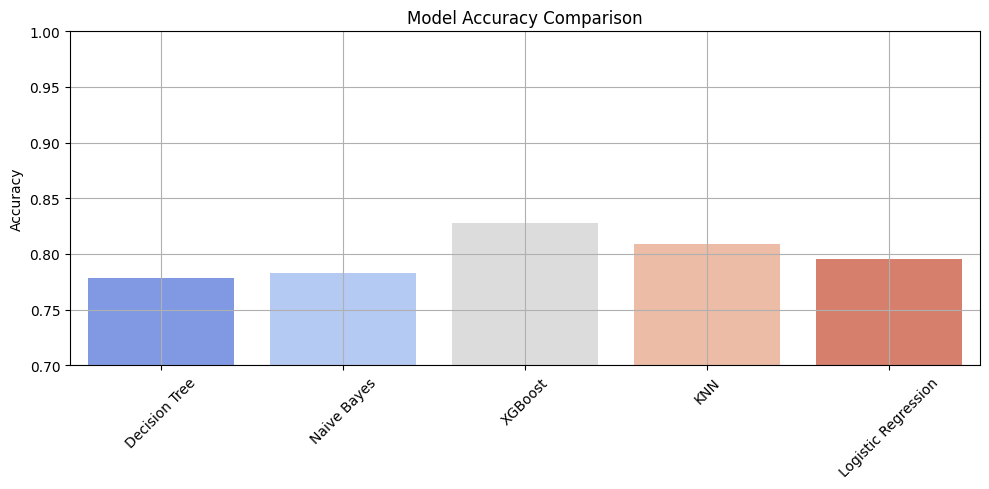

In [ ]:
# Step 12: Accuracy Comparison Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.70, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 13: Save Best Model
best_model_name = max(results, key=results.get)
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_model_name])
])
best_pipeline.fit(X, y)
joblib.dump(best_pipeline, "best_model.pkl")
print(f"\n🎯 Best model saved as 'best_model.pkl' ➡ {best_model_name}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🎯 Best model saved as 'best_model.pkl' ➡ XGBoost


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install streamlit -q

In [ ]:
%%writefile app.py
# app.py
import streamlit as st
import pandas as pd
import joblib

# Load the saved model
model = joblib.load("best_model.pkl")

# Streamlit UI setup
st.set_page_config(page_title="💼 Employee Salary Classifier", layout="centered")
st.title("💼 Employee Salary Prediction App")
# st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Input form
with st.form("prediction_form"):
    st.subheader("🧾 Input Employee Details")

    age = st.slider("Age", 17, 75, 30)
    education_num = st.slider("Education Level (1 = 1st-4th Grade, 12 = Doctorate)", 1, 12, 8)
    workclass = st.selectbox("Workclass", [
        "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",
        "Local-gov", "State-gov", "Without-pay", "Never-worked", "Others"
    ])
    occupation = st.selectbox("Occupation", [
        "Tech-support", "Craft-repair", "Other-service", "Sales",
        "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
        "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
        "Protective-serv", "Armed-Forces", "Others"
    ])
    relationship = st.selectbox("Relationship", [
        "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
    ])
    gender = st.selectbox("Gender", ["Male", "Female"])
    hours_per_week = st.slider("Hours Worked Per Week", 1, 90, 40)

    submit = st.form_submit_button("Predict")

if submit:
    # Mapping dictionaries
    workclass_map = {
        "Private": 3, "Self-emp-not-inc": 6, "Self-emp-inc": 5,
        "Federal-gov": 1, "Local-gov": 2, "State-gov": 7,
        "Without-pay": 8, "Never-worked": 0, "Others": 4
    }

    occupation_map = {
        "Tech-support": 12, "Craft-repair": 3, "Other-service": 9, "Sales": 11,
        "Exec-managerial": 4, "Prof-specialty": 10, "Handlers-cleaners": 6,
        "Machine-op-inspct": 7, "Adm-clerical": 0, "Farming-fishing": 5,
        "Transport-moving": 13, "Priv-house-serv": 8, "Protective-serv": 14,
        "Armed-Forces": 1, "Others": 2
    }

    relationship_map = {
        "Wife": 5, "Own-child": 1, "Husband": 0,
        "Not-in-family": 2, "Other-relative": 3, "Unmarried": 4
    }

    gender_map = {"Male": 1, "Female": 0}

    # Calculate experience
    experience = age - education_num - 6
    experience = max(0, experience)

    # Prepare input data
    input_data = pd.DataFrame([{
        "age": age,
        "workclass": workclass_map[workclass],
        "occupation": occupation_map[occupation],
        "hours-per-week": hours_per_week,
        "educational-num": education_num,
        "relationship": relationship_map[relationship],
        "gender": gender_map[gender],
        "experience": experience
    }])

    # Model prediction
    prediction = model.predict(input_data)[0]
    prediction_proba = model.predict_proba(input_data)[0]

  #   # Output Section
  #   st.markdown("## 📊 Prediction Result")

  #   if prediction > 50000 :
  #       st.success("✅ This employee is likely to earn **> $50K**")
  #   else:
  #       st.warning("🔻 This employee is likely to earn **≤ $50K**")

  #  # st.markdown(f"**Prediction Confidence:** {max(prediction_proba) * 100:.2f}%")

    # Salary Estimation Logic
    base_salary = {
        "Tech-support": 28000, "Craft-repair": 30000, "Other-service": 22000, "Sales": 25000,
        "Exec-managerial": 55000, "Prof-specialty": 48000, "Handlers-cleaners": 23000,
        "Machine-op-inspct": 26000, "Adm-clerical": 24000, "Farming-fishing": 21000,
        "Transport-moving": 27000, "Priv-house-serv": 20000, "Protective-serv": 29000,
        "Armed-Forces": 31000, "Others": 23000
    }

    base = base_salary[occupation]
    edu_bonus = (education_num - 5) * 1000
    hour_bonus = max(0, hours_per_week - 40) * 200
    estimated_salary = max(15000, base + edu_bonus + hour_bonus)

    st.markdown(f"💰 **Estimated Salary**: ${estimated_salary:,.2f} USD")

    # Model info and footer
    st.markdown("🔍 Model: Trained using best-performing algorithm from 5 ML models (Decision Tree, NB, XGBoost, KNN, Logistic Regression).")

    st.markdown("---")
    st.markdown("© 2025 Created by **Dhruv Patel**")


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.185.58.97


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.58.97:8501

⠼⠴⠦⠧⠇⠏⠋your url is: https://nice-deer-dream.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:27485 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙